In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
# Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.

In [16]:
# load the dataset
data = pd.read_csv(r'C:\Users\imkye\Desktop\diabetes.csv')
data = data.rename({'DiabetesPedigreeFunction':'DPF'}, axis=1)  # axis=0 은 index, axis=1 은 column 
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# check the missing value
data[data.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome


In [18]:
# Check the dataset ..
print('Data Shape = ',data.shape)
print('Number of Attributes = ', data.shape[1]-1)
print('List of Attributes', list(data.columns[1:-1]))

Data Shape =  (768, 9)
Number of Attributes =  8
List of Attributes ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']


In [19]:
# data description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
print('data types of features\n', data.dtypes)

data types of features
 Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object


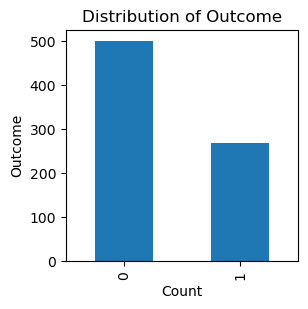

In [21]:
# Plot the dataset (Outcome)
plt.figure(figsize=(3,3))
data['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Outcome')
plt.title('Distribution of Outcome')
plt.show()

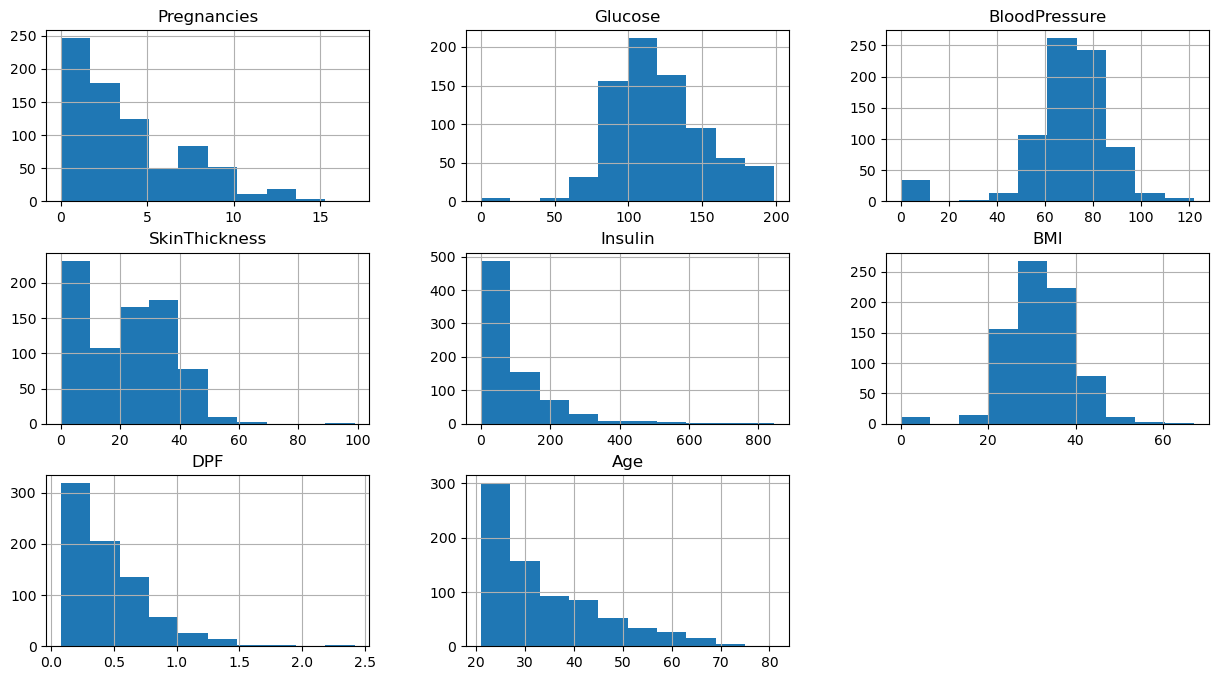

In [22]:
# plot each attribute in histogram
data.iloc[:,:-1].hist(figsize=(15,8))  # data.iloc[행위치,열위치] 
plt.show()

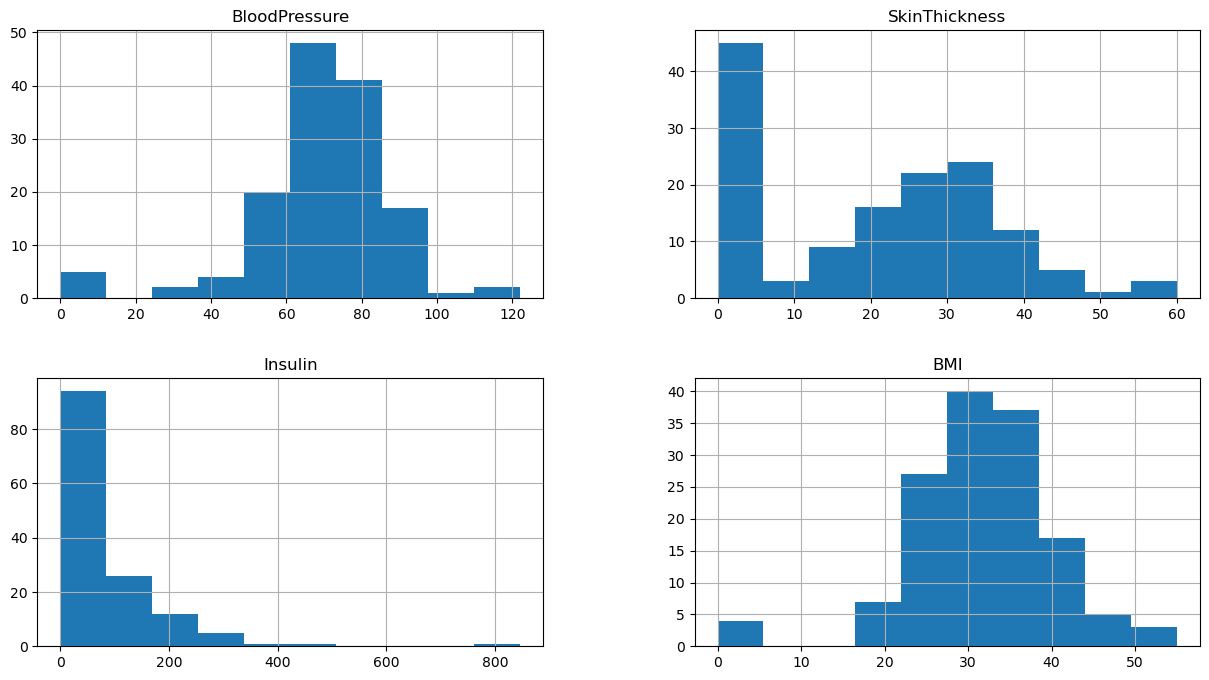

In [23]:
# plot each attribute in histogram
data.iloc[10:150,2:6].hist(figsize=(15,8))  # data.iloc[행위치,열위치] 
plt.show()

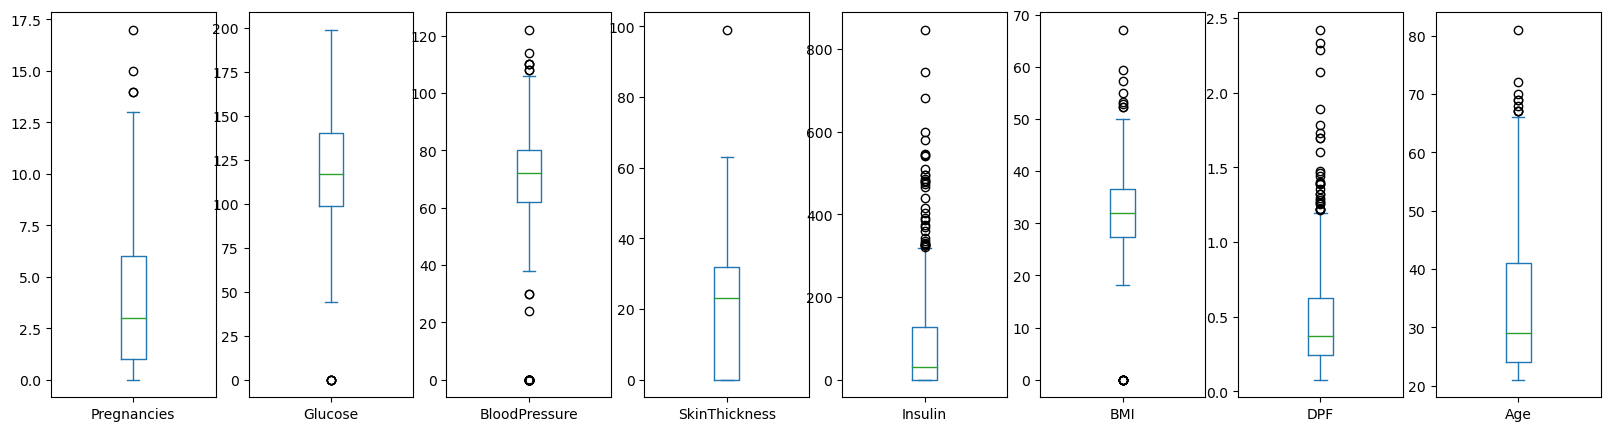

In [24]:
# plot each attribute in boxplot
data.iloc[:,:-1].plot(kind= 'box' , subplots=True, layout=(1,8), sharex=False, sharey=False, figsize=(20,5))
plt.show()

<Figure size 2000x2000 with 0 Axes>

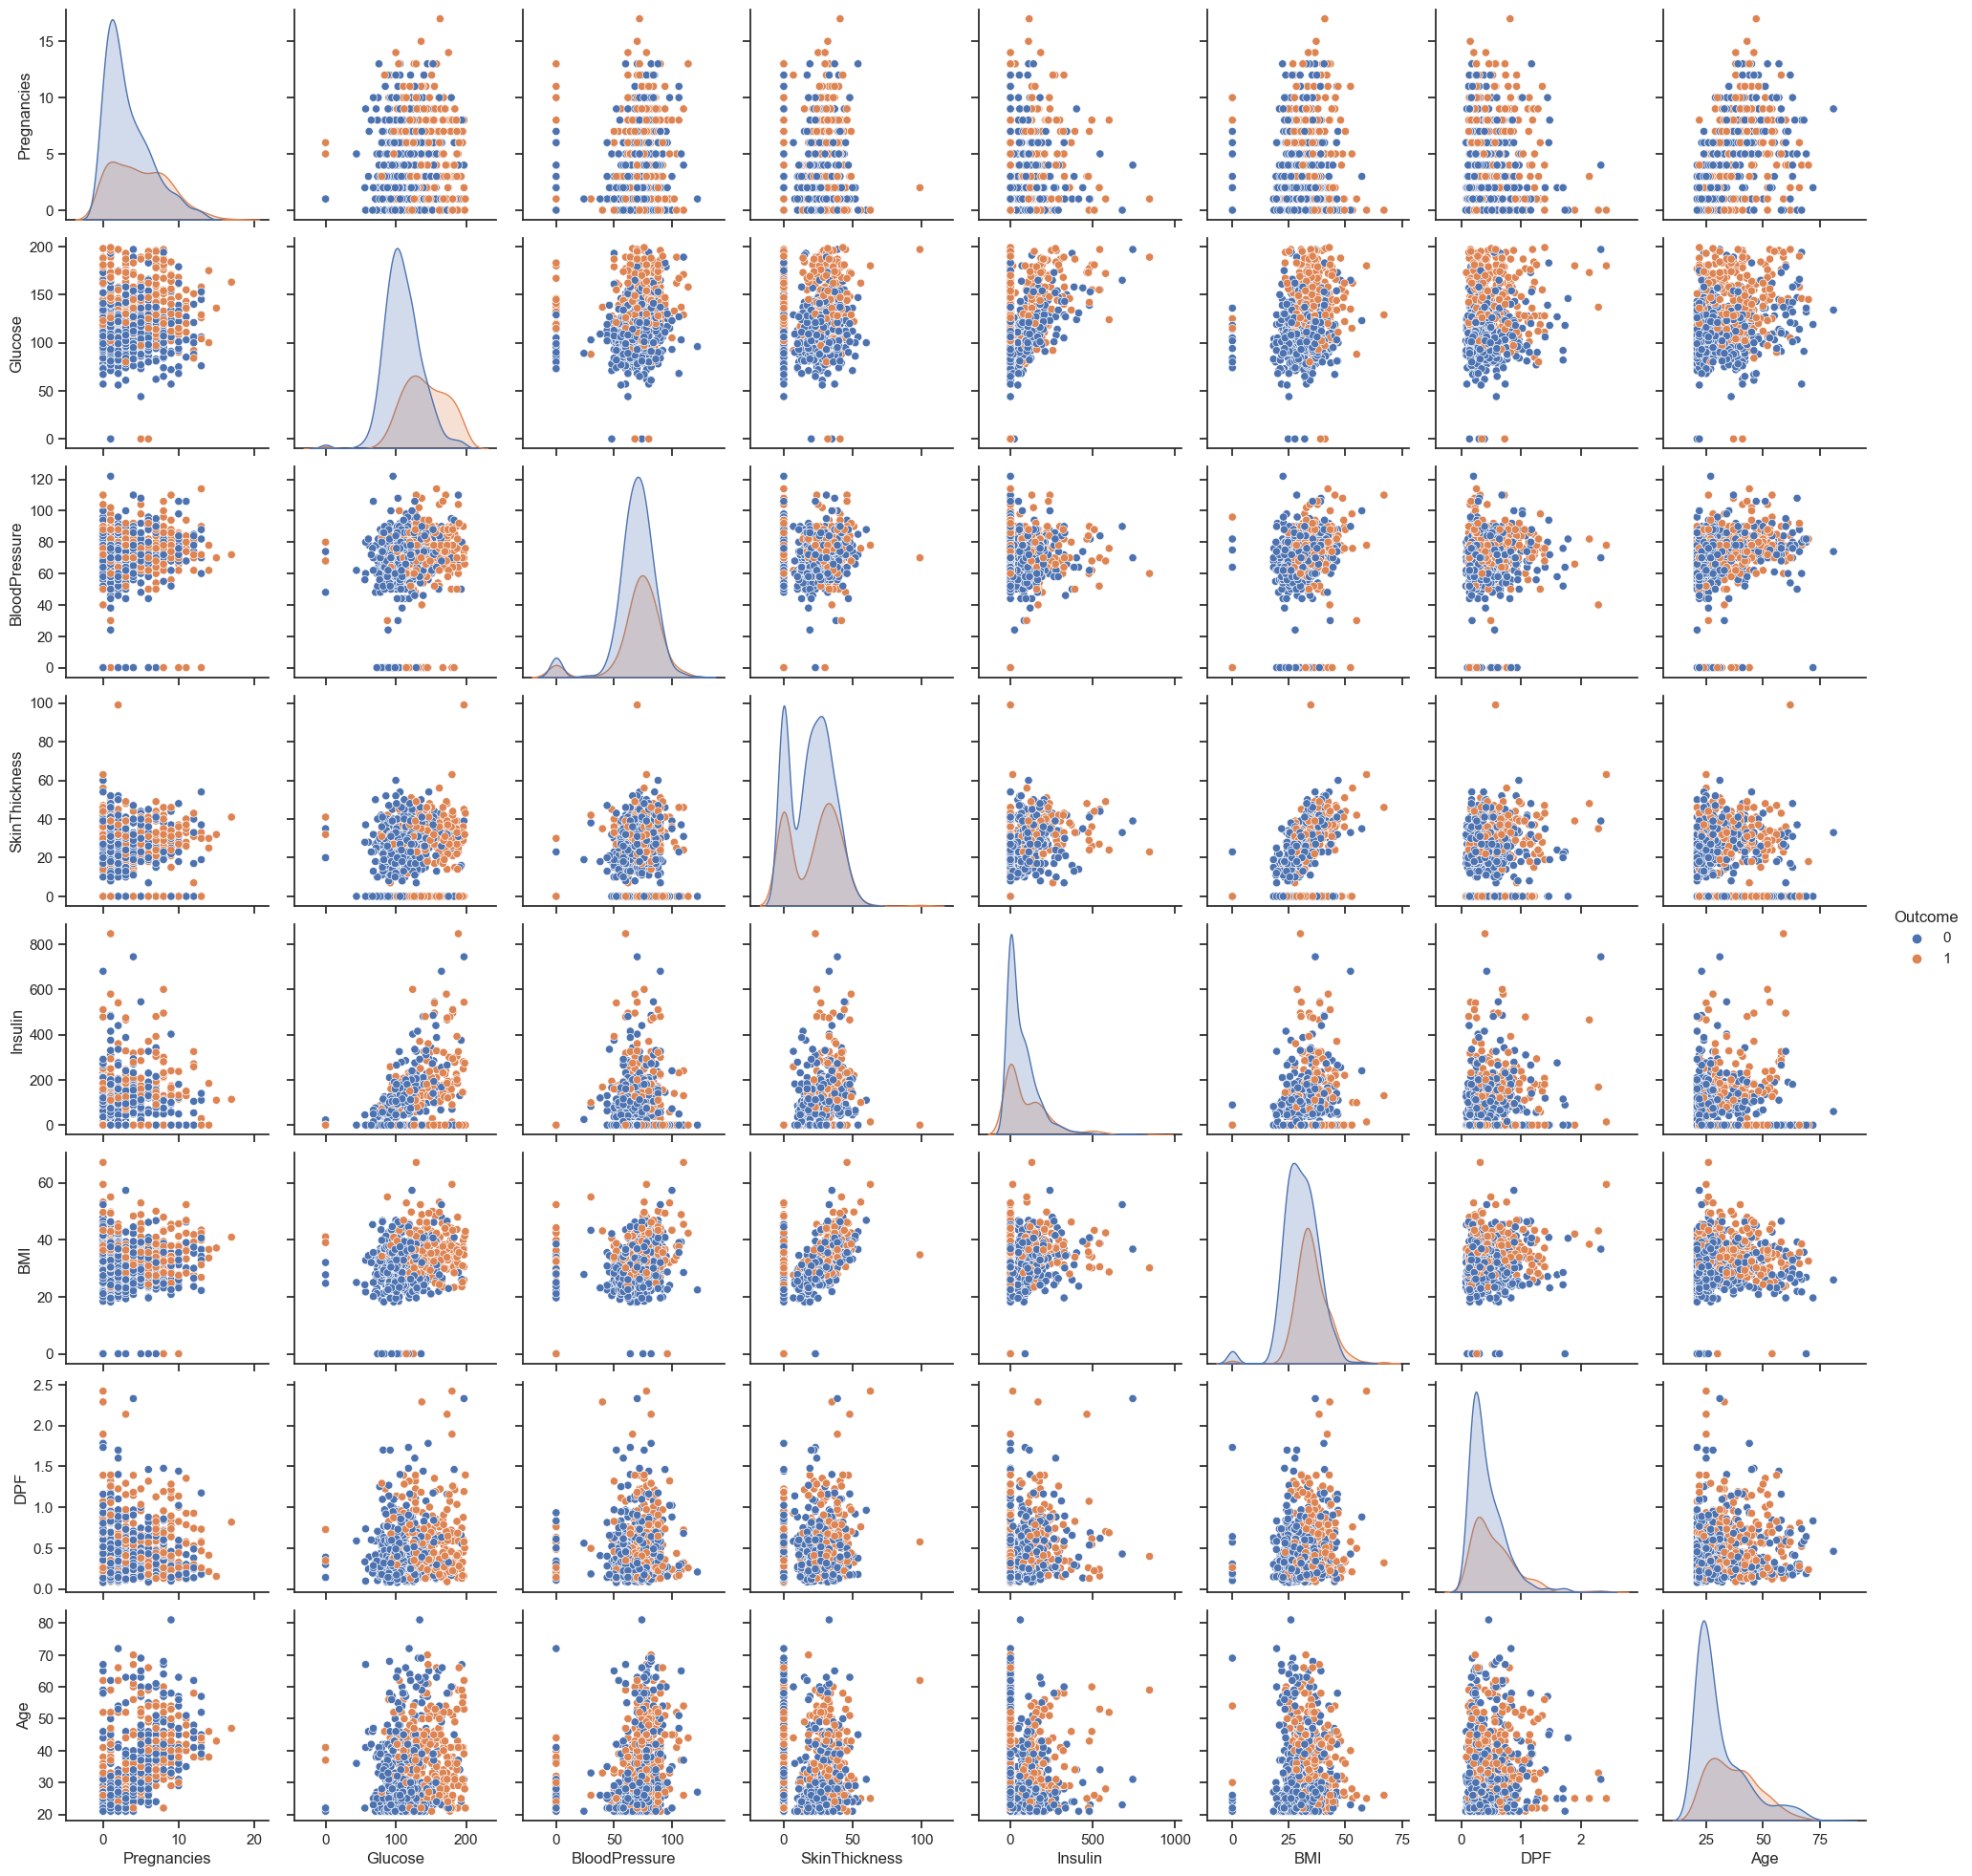

In [25]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Outcome')

In [26]:
# make a copy data for experiment
experiment = data.copy()

In [27]:
# calculate correlation matrix
corr_exp = experiment.corr()


Text(0.5, 1.0, 'Correlation Matrix All Attributes')

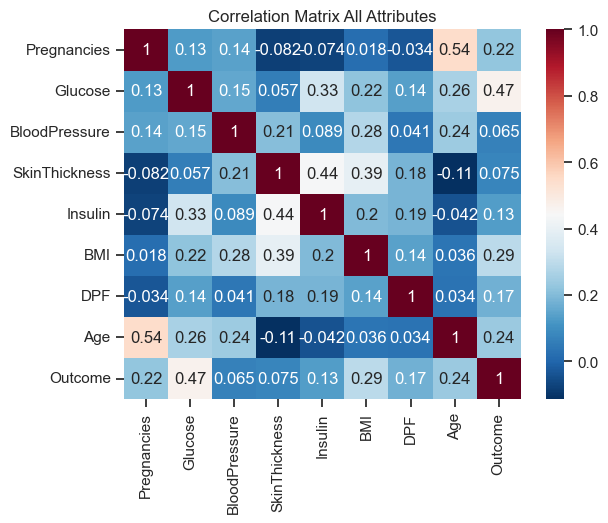

In [28]:
# plot the correlation matrix in heatmap
sns.heatmap(corr_exp, cbar = True, annot = True, cmap='RdBu_r')
plt.title('Correlation Matrix All Attributes')

In [29]:
# Split into features and label data
X = experiment.iloc[:,:-1]
y = experiment.iloc[:,-1]

In [30]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print('Number of Data = ', X.shape[0])
print('Number of Training Set = ', X_train.shape[0])
print('Number of Testing Set = ', X_test.shape[0])

Number of Data =  768
Number of Training Set =  537
Number of Testing Set =  231


In [31]:
# build Decision Tree with different depth
gini_dt_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=10)

# fit into the model
gini_dt_2.fit(X_train, y_train)

# Subset accuracy
gini_dt_2_score_train = gini_dt_2.score(X_train, y_train)
gini_dt_2_score_test = gini_dt_2.score(X_test, y_test)

print(gini_dt_2_score_train)
print(gini_dt_2_score_test)

0.7523277467411545
0.7445887445887446


In [32]:
# build Decision Tree with different depth
gini_dt_4 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=10)

# fit into the model
gini_dt_4.fit(X_train, y_train)

# Subset accuracy
gini_dt_4_score_train = gini_dt_4.score(X_train, y_train)
gini_dt_4_score_test = gini_dt_4.score(X_test, y_test)

print(gini_dt_4_score_train)
print(gini_dt_4_score_test)

0.8156424581005587
0.7012987012987013


In [33]:
# build Decision Tree with different depth
gini_dt_8 = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=10)

# fit into the model
gini_dt_8.fit(X_train, y_train)

# Subset accuracy
gini_dt_8_score_train = gini_dt_8.score(X_train, y_train)
gini_dt_8_score_test = gini_dt_8.score(X_test, y_test)

print(gini_dt_8_score_train)
print(gini_dt_8_score_test)


0.9422718808193669
0.670995670995671


In [34]:
# build Decision Tree with different depth
gini_dt = DecisionTreeClassifier(criterion='gini', random_state=10)

# fit into the model
gini_dt.fit(X_train, y_train)

# Subset accuracy
gini_dt_score_train = gini_dt.score(X_train, y_train)
gini_dt_score_test = gini_dt.score(X_test, y_test)

print(gini_dt_score_train)
print(gini_dt_score_test)

1.0
0.683982683982684


In [35]:
# Summarize the result !
print('Accuracy Score by Gini Index\n')
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '------------------','-----------------'))
print('{:3} {:>25} {:>20}'.format(2, gini_dt_2_score_train, gini_dt_2_score_test))
print('{:3} {:>25} {:>20}'.format(4, gini_dt_4_score_train, gini_dt_4_score_test))
print('{:3} {:>25} {:>20}'.format(8, gini_dt_8_score_train, gini_dt_8_score_test))
print('{:3} {:>25} {:>20}'.format("max", gini_dt_score_train, gini_dt_score_test))

Accuracy Score by Gini Index

depth      Training score       Testing score       
-----      ------------------   -----------------   
  2        0.7523277467411545   0.7445887445887446
  4        0.8156424581005587   0.7012987012987013
  8        0.9422718808193669    0.670995670995671
max                       1.0    0.683982683982684


In [36]:
# build Decision Tree with different depth
ent_dt_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=10)

# fit into the model
ent_dt_2.fit(X_train, y_train)

# Subset accuracy
ent_dt_2_score_train = ent_dt_2.score(X_train, y_train)
ent_dt_2_score_test = ent_dt_2.score(X_test, y_test)

print(ent_dt_2_score_train)
print(ent_dt_2_score_test)

0.7523277467411545
0.7445887445887446


In [37]:
# build Decision Tree with different depth
ent_dt_4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

# fit into the model
ent_dt_4.fit(X_train, y_train)

# Subset accuracy
ent_dt_4_score_train = ent_dt_4.score(X_train, y_train)
ent_dt_4_score_test = ent_dt_4.score(X_test, y_test)

print(ent_dt_4_score_train)
print(ent_dt_4_score_test)

0.7951582867783985
0.70995670995671


In [38]:
# build Decision Tree with different depth
ent_dt_8 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=10)

# fit into the model
ent_dt_8.fit(X_train, y_train)

# Subset accuracy
ent_dt_8_score_train = ent_dt_8.score(X_train, y_train)
ent_dt_8_score_test = ent_dt_8.score(X_test, y_test)

print(ent_dt_8_score_train)
print(ent_dt_8_score_test)

0.9050279329608939
0.6926406926406926


In [39]:
# build Decision Tree with different depth
ent_dt = DecisionTreeClassifier(criterion='entropy', random_state=10)

# fit into the model
ent_dt.fit(X_train, y_train)

# Subset accuracy
ent_dt_score_train = ent_dt.score(X_train, y_train)
ent_dt_score_test = ent_dt.score(X_test, y_test)

print(ent_dt_score_train)
print(ent_dt_score_test)

1.0
0.6493506493506493


In [40]:
# Summarize the result !
print('Accuracy Score by Entropy \n')
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '------------------','-----------------'))
print('{:3} {:>25} {:>20}'.format(2, ent_dt_2_score_train, ent_dt_2_score_test))
print('{:3} {:>25} {:>20}'.format(4, ent_dt_4_score_train, ent_dt_4_score_test))
print('{:3} {:>25} {:>20}'.format(8, ent_dt_8_score_train, ent_dt_8_score_test))
print('{:3} {:>25} {:>20}'.format("max", ent_dt_score_train, ent_dt_score_test))

Accuracy Score by Entropy 

depth      Training score       Testing score       
-----      ------------------   -----------------   
  2        0.7523277467411545   0.7445887445887446
  4        0.7951582867783985     0.70995670995671
  8        0.9050279329608939   0.6926406926406926
max                       1.0   0.6493506493506493


In [41]:
# initialize the parameters
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': list(range(2, 16)),
    'min_samples_leaf': list(range(1, 6)),
    'min_samples_split': list(range(2, 6)),
    'random_state':[10]
}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1, cv=5)

In [42]:
# Train the model
get_ipython().run_line_magic('time', 'clf.fit(X_train, y_train)')


CPU times: total: 2.55 s
Wall time: 23.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [10]})

In [43]:
# check the best paramaters
clf.best_params_


# In[29]:


# use the best estimator as model classfier
my_model = clf.best_estimator_

# fit data into the model 
my_model.fit(X_train, y_train)

# Subset accuracy
my_model_score_train = my_model.score(X_train, y_train)
my_model_score_test = my_model.score(X_test, y_test)

print(clf.best_estimator_)
print()
print('Training Score = ',my_model_score_train)
print('Testing Score = ',my_model_score_test)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=10)

Training Score =  0.8119180633147114
Testing Score =  0.7056277056277056


In [44]:
# make predicition with the "best" model
y_pred = my_model.predict(X_test)

# print accuracy score
print('Accuracy:',accuracy_score(y_test, y_pred))
print()

# evaluate the performance classification report
print(classification_report(y_test, y_pred))

# evaluate the performace using confusion matrix
print('COnfusion Matrix')
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes']
)

Accuracy: 0.7056277056277056

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       150
           1       0.59      0.54      0.56        81

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

COnfusion Matrix


,Predicted No,Predicted Yes
Actual No,119,31
Actual Yes,37,44


<AxesSubplot:>

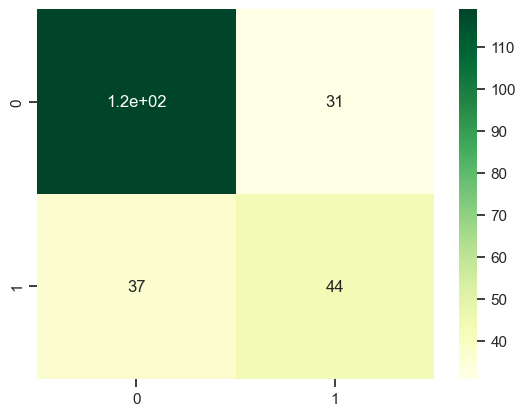

In [45]:
display(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn"))

In [46]:
# Calculate the importance value each feature
features = pd.DataFrame(X.columns.tolist())
features.columns = ['Features']

fi = pd.DataFrame(my_model.feature_importances_)
fi.columns = ['Value']

# merge the data and show top-5 most important features
fea_imp = pd.concat([features, fi], axis=1)
fea_imp.sort_values(by='Value', ascending = False)

,Features,Value
1,Glucose,0.556722
5,BMI,0.218531
7,Age,0.064363
0,Pregnancies,0.063025
2,BloodPressure,0.041348
4,Insulin,0.030195
6,DPF,0.021734
3,SkinThickness,0.004082


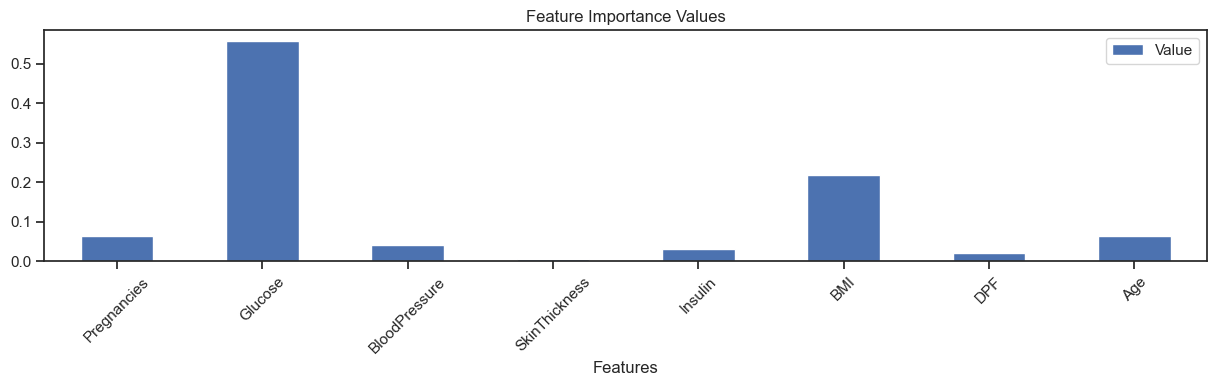

In [47]:
# plot the feature important values
fea_imp.plot.bar(x='Features', y='Value', figsize=(15,3))
plt.xticks(rotation=45)
plt.title('Feature Importance Values')
plt.show()

In [48]:
# Split into features and label data
important = experiment[['Glucose', 'BMI', 'Age', 'Pregnancies','Outcome']]
print(important.columns)
print(important.shape)
print()

Xs = important.iloc[:,:-1]
ys = important.iloc[:,-1]

# # Split into training and test set
X_trains, X_tests, y_trains, y_tests = train_test_split(Xs, ys, test_size=0.3, stratify=ys, random_state=100)

# use the best estimator as model classfier
my_models = clf.best_estimator_

# fit data into the model 
my_models.fit(X_trains, y_trains)

# Subset accuracy
my_models_score_train = my_models.score(X_trains, y_trains)
my_models_score_test = my_models.score(X_tests, y_tests)

print('Training score = ', my_models_score_train)
print('Testing score = ',my_models_score_test)
print()

# make predicition with the best model
y_preds = my_models.predict(X_tests)


# print accuracy score
print('Accuracy:',accuracy_score(y_tests, y_preds))
print()

# evaluate the performance classification report
print(classification_report(y_tests, y_preds))

# evaluate the performace using confusion matrix
pd.DataFrame(
    confusion_matrix(y_tests, y_preds),
    columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes']
)

Index(['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome'], dtype='object')
(768, 5)

Training score =  0.7951582867783985
Testing score =  0.7272727272727273

Accuracy: 0.7272727272727273

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       150
           1       0.60      0.68      0.64        81

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



,Predicted No,Predicted Yes
Actual No,113,37
Actual Yes,26,55


In [49]:
# ### Summary
# 
# ##### A Decision-Tree Classifier model was built to predict a person has diabetes or not using the medical attributes provided.
# ##### Two different models were built, one with criterion gini index and another one with criterion entropy. The models yields a good performance as indicated by the model accuracy.
# ##### To get better results, GridSearch was utilized to find the best parameter combinations.
# ##### The best model achieved 0.81 and 0.70 accuracy score for training and testing accuracy, respectively.
# ##### The confusion matrix and classification report yields good model performance. 
# 
